In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
results=calc_temps('2017-08-01', '2017-08-07')
print(f" The Min, Average, and Max Temps for the first week in August 2017 are", results)

 The Min, Average, and Max Temps for the first week in August 2017 are [(72.0, 79.25, 83.0)]


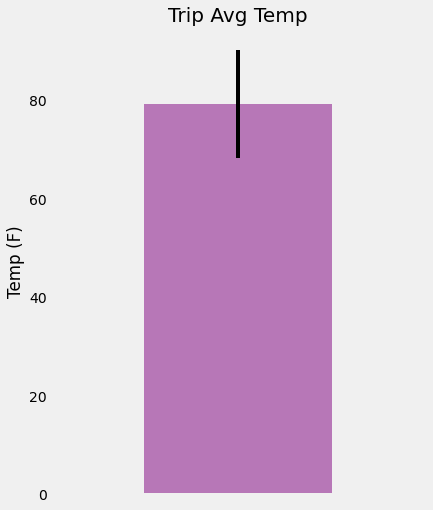

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip = pd.DataFrame(results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg = trip['Avg Temp']
min_max = trip.iloc[0]['Max Temp'] - trip.iloc[0]['Min Temp']
avg.plot(kind='bar', yerr=min_max, figsize=(6,8), alpha=0.5, color='purple')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig(".//Images//TripTempSummary.png")
plt.show()

### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2017-08-01'
end_date = '2017-08-07'

s = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

for row in s:
    rain="{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall:  {rain}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}\n    Latitude:  {row[4]}\n    Longitude:  {row[5]}")
    print()

Station:  USC00516128
    Rainfall:  0.36  
    Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4
    Latitude:  21.3331
    Longitude:  -157.8025

Station:  USC00514830
    Rainfall:  0.22  
    Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Elevation:  7.0
    Latitude:  21.5213
    Longitude:  -157.8374

Station:  USC00519281
    Rainfall:  0.06  
    Location:  WAIHEE 837.5, HI US
    Elevation:  32.9
    Latitude:  21.45167
    Longitude:  -157.84888999999998

Station:  USC00519397
    Rainfall:  0.04  
    Location:  WAIKIKI 717.2, HI US
    Elevation:  3.0
    Latitude:  21.2716
    Longitude:  -157.8168

Station:  USC00519523
    Rainfall:  0.00  
    Location:  WAIMANALO EXPERIMENTAL FARM, HI US
    Elevation:  19.5
    Latitude:  21.33556
    Longitude:  -157.71139



### Daily Temperature Normals

In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [14]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip


# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d

start_date = dt.datetime.strptime('08-01', "%m-%d")
end_date = dt.datetime.strptime('08-07', "%m-%d")
#st_str_dt = start_date.strftime("%m-%d")
normals = []
dt_list = []

iter_date = start_date
while iter_date <= end_date:
    dt_list.append(iter_date)
    st_str_dt = iter_date.strftime("%m-%d")
    #print(st_str_dt)
    iter_date += dt.timedelta(1)
    normals.append(*daily_normals(st_str_dt))

dt_list
#normals
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


[datetime.datetime(1900, 8, 1, 0, 0),
 datetime.datetime(1900, 8, 2, 0, 0),
 datetime.datetime(1900, 8, 3, 0, 0),
 datetime.datetime(1900, 8, 4, 0, 0),
 datetime.datetime(1900, 8, 5, 0, 0),
 datetime.datetime(1900, 8, 6, 0, 0),
 datetime.datetime(1900, 8, 7, 0, 0)]

In [15]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_norms = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
#not sure why it's pulling the year even though I stripped the Year in the previous cells?! 
df_norms['Date'] = pd.DataFrame(dt_list)
df_norms.set_index('Date', inplace=True)
df_norms

,tmin,tavg,tmax
Date,,,
1900-08-01,67.0,75.540000,83.0
1900-08-02,68.0,75.603774,84.0
1900-08-03,70.0,76.611111,85.0
1900-08-04,69.0,76.711538,84.0
1900-08-05,69.0,76.148148,82.0
1900-08-06,67.0,76.250000,83.0
1900-08-07,71.0,77.156863,83.0


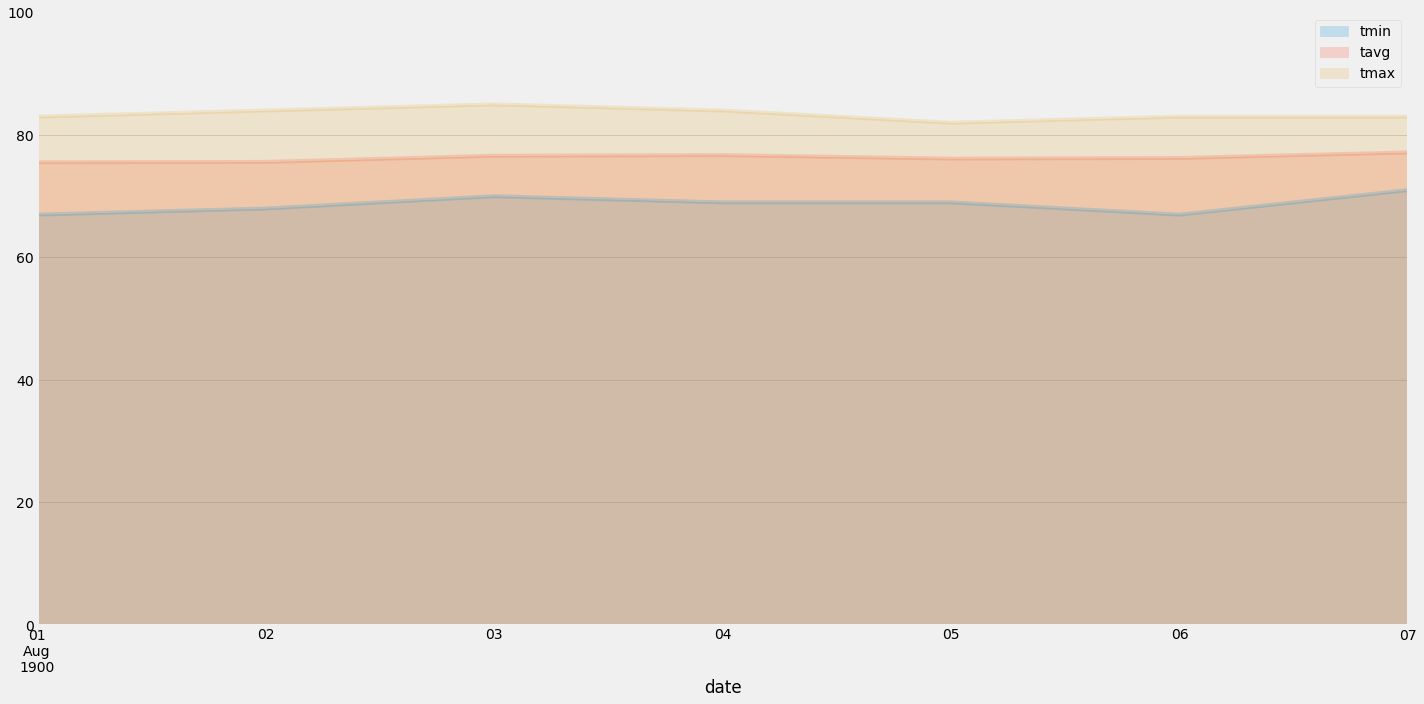

In [18]:
# Plot the daily normals as an area plot with `stacked=False`
df_norms.plot.area(stacked=False, alpha=0.2,figsize=(20,10))
plt.xlabel("date")
#plt.xticks(df2["Date"], rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('.//Images//daily_normals.png')

## Close Session

In [19]:
# Close Session
session.close()